# Estudo de Caso


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [3]:
import pandas as pd

In [4]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

## Gráfico 1: Boxplot – Limite de Crédito por Profissão

Vamos ver se a profissão influencia o limite de crédito.

<Figure size 1000x600 with 0 Axes>

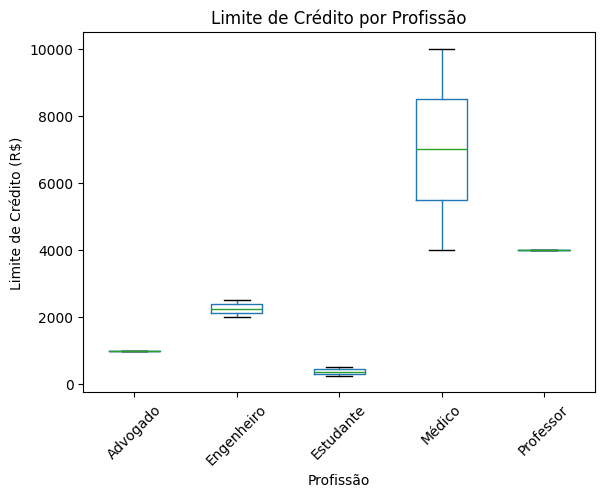

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrigindo os tipos numéricos
df['Salário'] = df['Salário'].astype(int)
df['Limite_Credito'] = df['Limite_Credito'].astype(int)
df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].astype(int)
df['Imovel_Proprio'] = df['Imovel_Proprio'].astype(int)

# --- Gráfico 1: Boxplot de Limite de Crédito por Profissão ---
plt.figure(figsize=(10, 6))
df.boxplot(column='Limite_Credito', by='Profissão', grid=False)
plt.title('Limite de Crédito por Profissão')
plt.suptitle('')
plt.xlabel('Profissão')
plt.ylabel('Limite de Crédito (R$)')
plt.xticks(rotation=45)
plt.show()

# Análise dos Gráficos – Pratique Gráficos Assertivos

## Gráfico 1: Limite de Crédito por Profissão

**Observação:**  
- Médicos possuem limites de crédito significativamente mais altos e bem distribuídos, o que indica uma forte relação entre profissões de alta renda e a confiança do mercado de crédito.
- Engenheiros e Advogados apresentam limites intermediários, mas ainda estáveis, refletindo boa capacidade de pagamento.
- Estudantes possuem limites bastante baixos, o que era esperado devido à falta de renda e histórico financeiro.

**Interpretação:**  
A profissão impacta diretamente o limite de crédito oferecido, pois está relacionada ao potencial de geração de renda e ao risco de inadimplência percebido pelas instituições financeiras.


## Gráfico 2: Dispersão – Idade vs Limite de Crédito

Vamos ver se quanto mais idade, mais limite a pessoa tem.

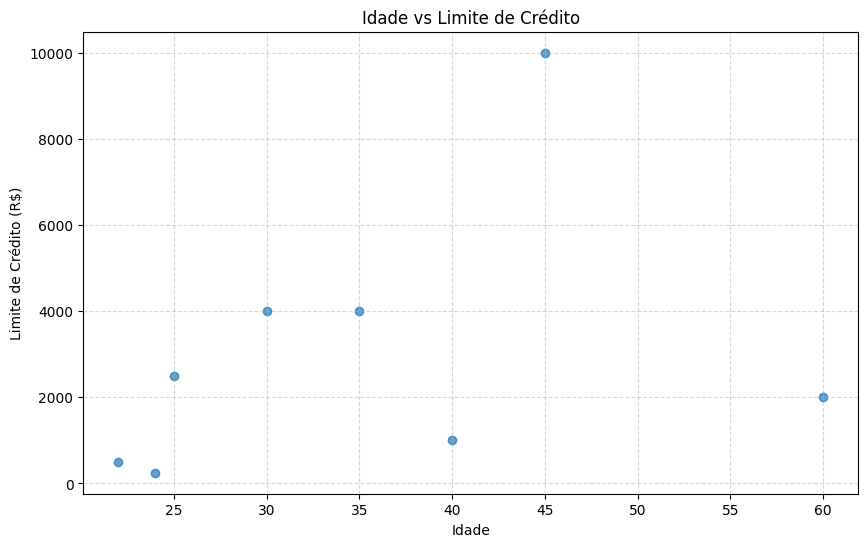

In [6]:
# --- Gráfico 2: Dispersão entre Idade e Limite de Crédito ---
plt.figure(figsize=(10, 6))
plt.scatter(df['Idade'], df['Limite_Credito'], alpha=0.7)
plt.title('Idade vs Limite de Crédito')
plt.xlabel('Idade')
plt.ylabel('Limite de Crédito (R$)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Gráfico 2: Idade vs Limite de Crédito

**Observação:**  
- A análise mostra que a idade mais avançada **não garante** automaticamente limites de crédito maiores.
- Existe uma maior concentração de bons limites de crédito entre pessoas com **30 a 45 anos**, o que representa a fase de maior estabilidade financeira e atividade no mercado de trabalho.

**Interpretação:**  
O perfil de crédito favorece clientes em plena atividade profissional, demonstrando que a estabilidade financeira é mais valorizada do que apenas a idade.

## Gráfico 3: Gráfico de Colunas – Histórico de Inadimplência vs Média do Limite de Crédito

Vamos confirmar se inadimplência (quem tem histórico de dívida) afeta o limite.

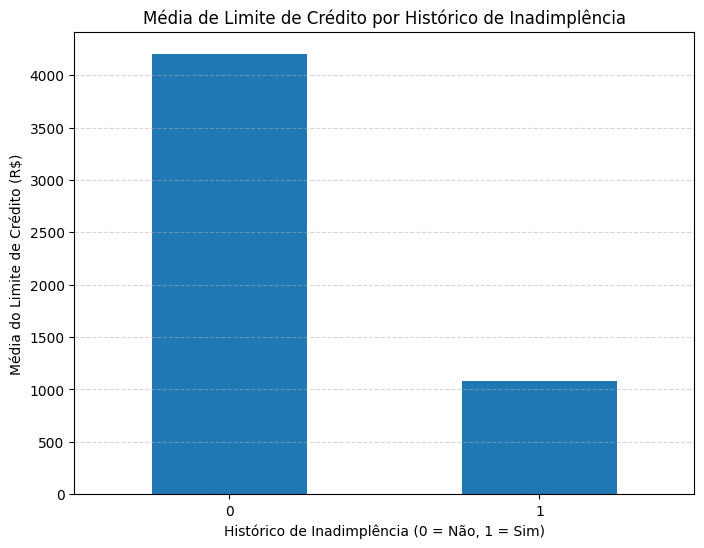

In [7]:
# --- Gráfico 3: Colunas – Histórico de Inadimplência vs Média do Limite de Crédito ---
plt.figure(figsize=(8, 6))
inadimplencia_media = df.groupby('Historico_Inadimplencia')['Limite_Credito'].mean()
inadimplencia_media.plot(kind='bar')
plt.title('Média de Limite de Crédito por Histórico de Inadimplência')
plt.xlabel('Histórico de Inadimplência (0 = Não, 1 = Sim)')
plt.ylabel('Média do Limite de Crédito (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Gráfico 3: Média de Limite de Crédito por Histórico de Inadimplência

**Observação:**  
- Clientes **sem histórico de inadimplência** têm uma média de limite de crédito muito superior aos clientes inadimplentes.
- O histórico negativo impacta diretamente o limite ofertado, reduzindo a confiança da instituição financeira no cliente.

**Interpretação:**  
O histórico de adimplência é um fator crítico na definição do limite de crédito. Clientes com bom histórico recebem limites maiores, demonstrando que a reputação financeira é essencial para a concessão de crédito.

#  Conclusão Final

Ao analisar os dados, ficou evidente que o **limite de crédito** está mais relacionado com fatores como **profissão**, **estabilidade financeira em determinada faixa etária** e **histórico de adimplência** do que simplesmente com a idade ou outros fatores isolados.  
Esses insights são fundamentais para entender o perfil de concessão de crédito adotado pelas instituições financeiras.